In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Car_data = pd.read_csv("/content/car_age_price.csv")
Car_data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
Car_data.shape

(112, 2)

In [4]:
Car_data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [5]:
x=Car_data.drop(['Price'],axis=1)
y=Car_data['Price']

In [6]:
x.head()

,Year
0,2018
1,2019
2,2019
3,2018
4,2018


In [7]:
y.tail()

,Price
107,375000
108,300000
109,425000
110,420000
111,425000


In [8]:
# Train models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.25)

# Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred=lr.predict(X_test)
y_pred

array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
print("MSE:",mse_linear)
print("R²",r2_linear)

MSE: 3878767151.073449
R² 0.4347961632108023


In [ ]:
# Predict  price for a 2022 model
price_linear = lr.predict([[2022]])

In [17]:
print("Predicted Price for 2022 Model:\n")
print(f"Linear Regression: {price_linear[0]:.2f}")

Predicted Price for 2022 Model:

Linear Regression: 740160.12


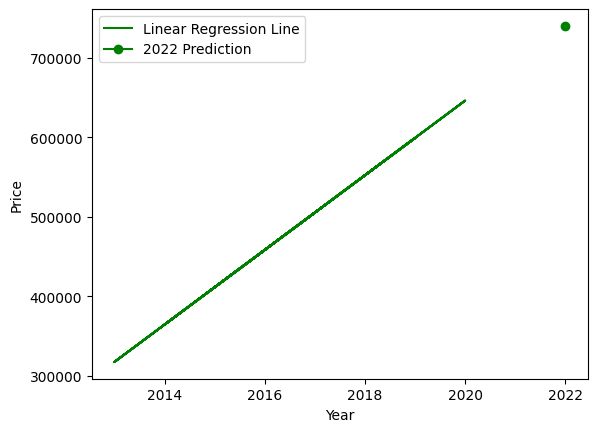

In [18]:
# Plot the results
plt.plot(x, lr.predict(x), color='green', label='Linear Regression Line')
plt.plot([2022], price_linear, color='green', marker='o', label='2022 Prediction')
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()


# Lasso Regression Model


In [19]:
# Lasso Regression Model
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [20]:
y_pred_lasso=lasso.predict(X_test)
y_pred_lasso

array([599222.10828854, 505264.87581331, 552243.49205092, 552243.49205092,
       552243.49205092, 411307.64333805, 505264.87581331, 552243.49205092,
       599222.10828854, 599222.10828854, 317350.4108628 , 505264.87581331,
       411307.64333805, 646200.72452617, 552243.49205092, 599222.10828854,
       317350.4108628 , 411307.64333805, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 411307.64333805, 411307.64333805])

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("MSE:",mse_lasso)
print("R²",r2_lasso)

MSE: 3878735896.222091
R² 0.4348007175862566


In [ ]:
# Predicted Price for 2022 Model
price_lasso = lasso.predict([[2022]])

In [26]:
print("Predicted Price for 2022 Model:\n")
print(f"Lasso Regression: {price_lasso[0]:.2f}")

Predicted Price for 2022 Model:

Lasso Regression: 740157.96


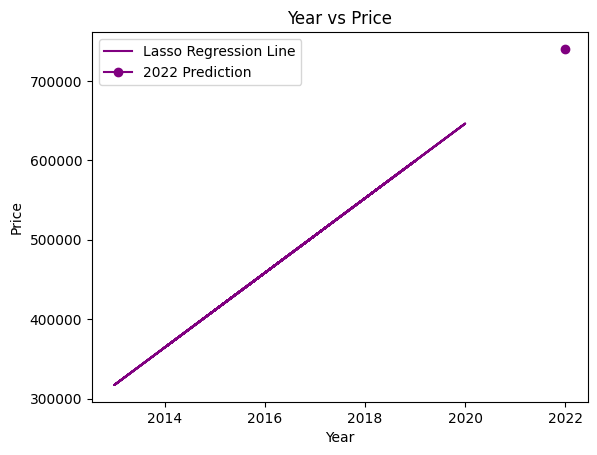

In [27]:
# Plot the results
plt.plot(x, lasso.predict(x), color='purple', label='Lasso Regression Line')
plt.plot([2022], price_linear, color='purple', marker='o', label='2022 Prediction')
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

**Which Regression performs better**

In [28]:
if mse_linear < mse_lasso and r2_linear < r2_lasso:
    print("Linear Regression performs better")
else:
    print("Lasso Regression performs better")

Lasso Regression performs better.
